In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [3]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "heartdisease"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)
heartdisease_df = pd.read_sql_query("select * from heartdisease", con=engine)

engine.dispose()

<IPython.core.display.Javascript object>

In [6]:
rows = heartdisease_df.shape[0] - heartdisease_df.shape[0] % 2
df = heartdisease_df.iloc[:rows, :]

X = df.iloc[:, :13]
y = df.iloc[:, 13]
X = X.replace(to_replace="?", value=0)
y = np.where(y > 0, 0, 1)

<IPython.core.display.Javascript object>

In [7]:
X_std = StandardScaler().fit_transform(X)

<IPython.core.display.Javascript object>

In [8]:
y_pred = pd.DataFrame()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

<IPython.core.display.Javascript object>

In [9]:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std, X_pca, test_size=0.5, random_state=13
)

<IPython.core.display.Javascript object>

In [12]:
for count, data in enumerate([(X_half1, X_pcahalf1), (X_half2, X_pcahalf2)]):
    y_pred["pca_f1" + "_sample" + str(count)] = data[1][:, 0]
    y_pred["pca_f2" + "_sample" + str(count)] = data[1][:, 1]

    for ncluster in range(2, 5):
        pred = KMeans(n_clusters=ncluster, random_state=13).fit_predict(data[0])
        y_pred["clust" + str(ncluster) + "_sample" + str(count)] = pred

<IPython.core.display.Javascript object>

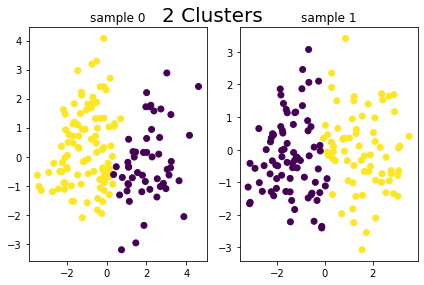

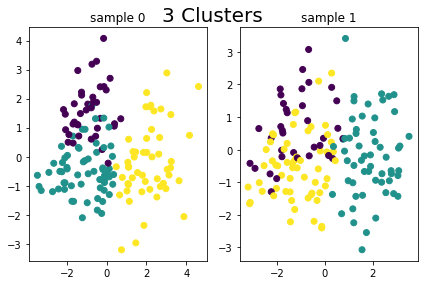

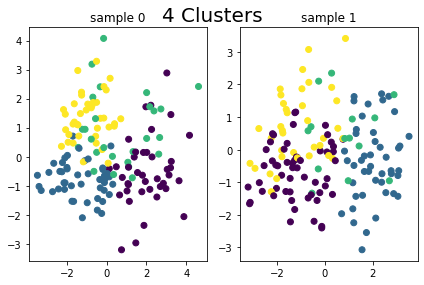

<IPython.core.display.Javascript object>

In [13]:
for cluster in range(2, 5):
    f, axarr = plt.subplots(1, 2)
    for i in range(2):

        x_sub = y_pred["pca_f1_sample{}".format(i)]
        y_sub = y_pred["pca_f2_sample{}".format(i)]

        # Cluster assignments.
        c = y_pred["clust{}_sample{}".format(cluster, i)]

        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title("sample {}".format(i))
        axarr[i].set_xlim()
        axarr[i].set_ylim()

    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle("{} Clusters".format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()

In [14]:
pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)

print("ARI for two cluster k-means: {}".format(metrics.adjusted_rand_score(y, pred_2)))
print(
    "ARI for three cluster k-means: {}".format(metrics.adjusted_rand_score(y, pred_3))
)
print("ARI for four cluster k-means: {}".format(metrics.adjusted_rand_score(y, pred_4)))

ARI for two cluster k-means: 0.43661540614807665
ARI for three cluster k-means: 0.280694132678885
ARI for four cluster k-means: 0.19162596502170298


<IPython.core.display.Javascript object>

In [15]:
pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)

print(
    "Silhouette score for two cluster k-means: {}".format(
        metrics.silhouette_score(X_std, pred_2, metric="euclidean")
    )
)
print(
    "Silhouette score for three cluster k-means: {}".format(
        metrics.silhouette_score(X_std, pred_3, metric="euclidean")
    )
)
print(
    "Silhouette score for four cluster k-means: {}".format(
        metrics.silhouette_score(X_std, pred_4, metric="euclidean")
    )
)

Silhouette score for two cluster k-means: 0.17440650461256255
Silhouette score for three cluster k-means: 0.12862190702187828
Silhouette score for four cluster k-means: 0.1314736248593191


<IPython.core.display.Javascript object>